<a href="https://colab.research.google.com/github/asurovi/Mathematical-Numerical-Bayesian-and-Causal-Problem-Solving/blob/main/Homework_2_Interpolation_Integration_Roots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2: Interpolation, Integration, Roots

**Name:** Agnila Ghosh Surovi

**Department:** Mechanical and Aerospace Engineering

**Date:** 2/2/2026

Problem 1: Making function
- define an (arbitrary) scalar function  
- plot a graph over a chosen range
- create an array of sampled points (e.g. 7)
- show the points on the graph

## Answer 1

Let's define a function, $f(x) = sin(x) + 0.3x$

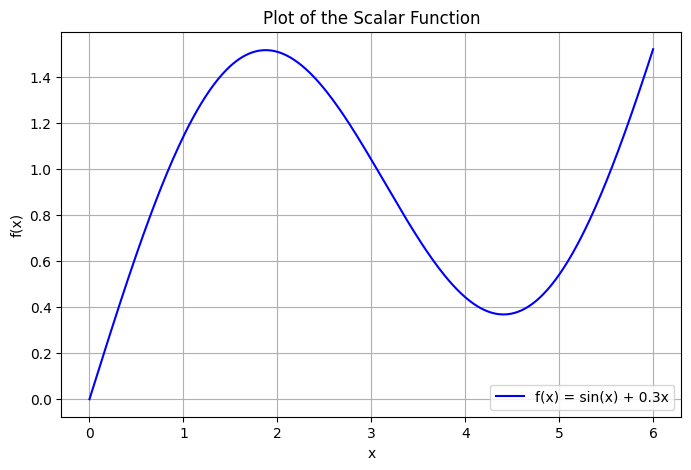

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Define the scalar function
# -----------------------------
def f(x):
  return np.sin(x) + 0.3*x

# -----------------------------
# Choose range for plotting
# -----------------------------
x_plot = np.linspace(0, 6, 400)
y_plot = f(x_plot)

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, color = 'blue', label='f(x) = sin(x) + 0.3x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the Scalar Function')
plt.legend()
plt.grid(True)
plt.show()

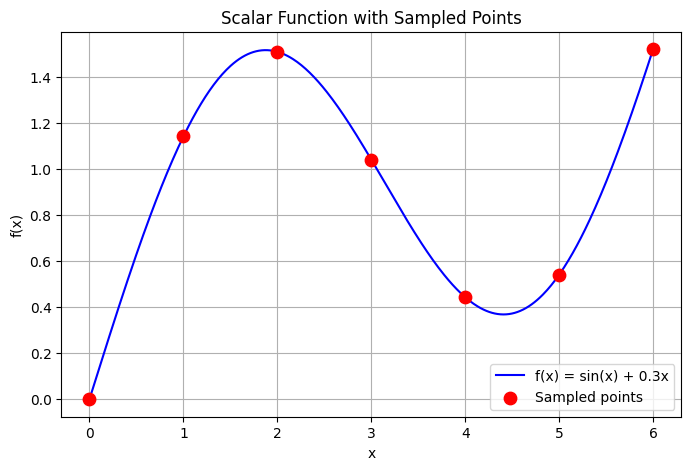

In [2]:
# -----------------------------
# Create sampled points
# -----------------------------
x_sample = np.linspace(0, 6, 7)
y_sample = f(x_sample)

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, color = 'blue', label='f(x) = sin(x) + 0.3x')
plt.scatter(x_sample, y_sample, s=80, marker='o', color = 'red', label='Sampled points', zorder=3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scalar Function with Sampled Points')
plt.legend()
plt.grid(True)
plt.show()

Problem 2: Spline interpolation
- Interpolate the function using spline method
- Plot the difference between original and interpolated function
- Differentiate the function (analytically or numerically)
- Differentiate the interpolated function
- Compare the results

## Answer 2

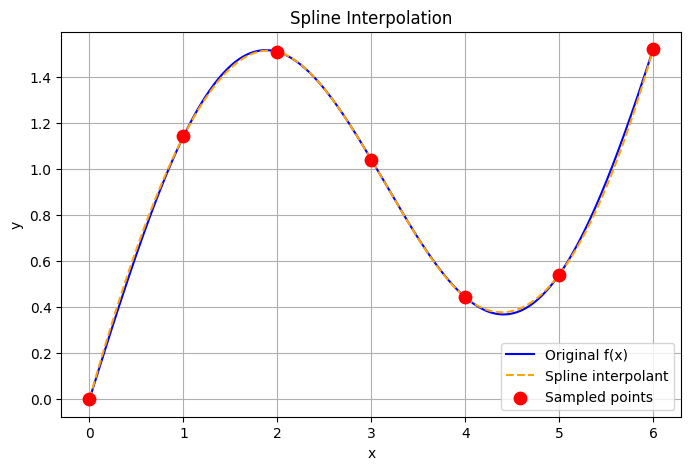

In [3]:
from scipy.interpolate import CubicSpline

spline = CubicSpline(x_sample, y_sample)

# Dense grid for comparison/plots
x = np.linspace(0, 6.0, 400)
y_true = f(x)
y_spl  = spline(x)

plt.figure(figsize=(8,5))
plt.plot(x, y_true, color='blue', label="Original f(x)")
plt.plot(x, y_spl, "--", color ='orange', label="Spline interpolant")
plt.scatter(x_sample, y_sample, s=80, color="red", zorder=3, label=f"Sampled points")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Spline Interpolation")
plt.grid(True)
plt.legend()
plt.show()

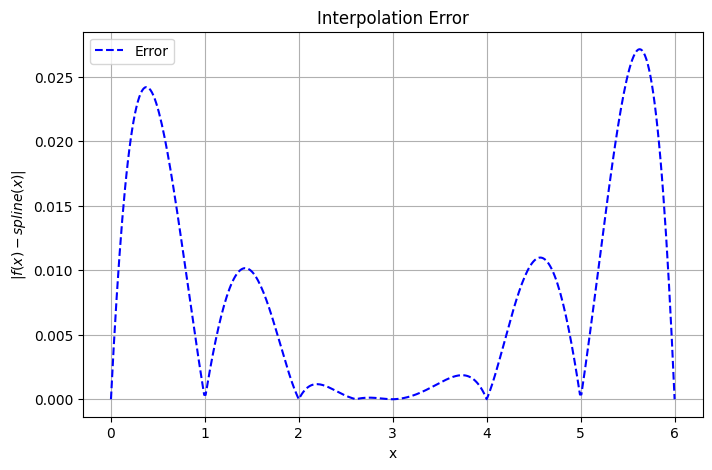

Function max error = 2.711e-02
Function RMS error = 1.120e-02


In [4]:
err = np.abs(y_true - y_spl)

plt.figure(figsize=(8,5))
plt.plot(x, err, "--", color ='blue', label="Error")
plt.xlabel("x"); plt.ylabel(r"$|f(x) - spline(x)|$")
plt.title("Interpolation Error")
plt.grid(True)
plt.legend()
plt.show()
print(f"Function max error = {np.max(err):.3e}")
print(f"Function RMS error = {np.sqrt(np.mean(err**2)):.3e}")


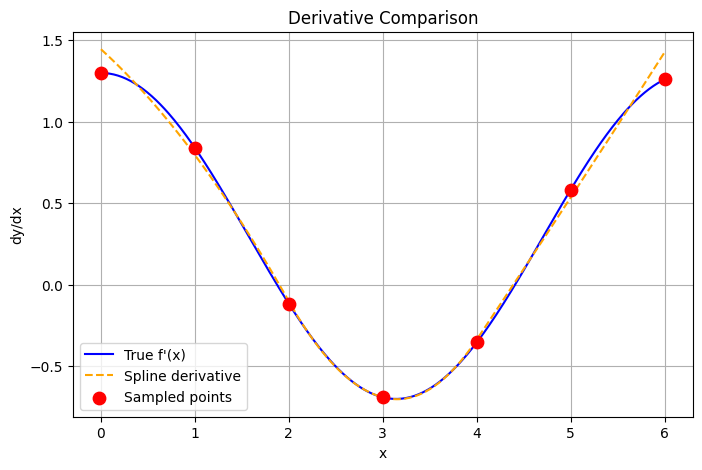

Derivative error norms on dense grid:
  max |f'(x) - spline'(x)|  = 1.667e-01
  RMS  (L2 approx)         = 3.868e-02


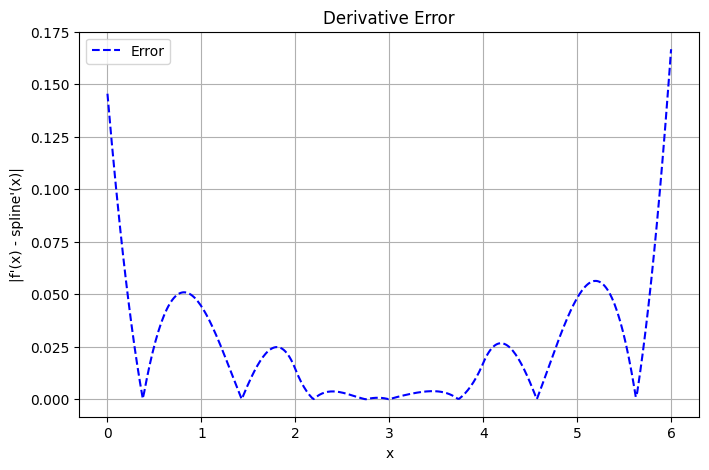

In [5]:
def fprime(x):  # analytic derivative
    return np.cos(x) + 0.3

# -----------------------------
# Differentiate original vs spline
# -----------------------------
yprime_true = fprime(x)
y_sample_prime = fprime(x_sample)

# spline derivative is another spline; evaluate it
spline_prime = spline.derivative()
yprime_spl = spline_prime(x)

# Plot derivatives
plt.figure(figsize=(8,5))
plt.plot(x, yprime_true, color = 'blue', label="True f'(x)")
plt.plot(x, yprime_spl, "--", color = 'orange', label="Spline derivative")
plt.scatter(x_sample, y_sample_prime, s=80, color="red", zorder=3, label="Sampled points")
plt.xlabel("x"); plt.ylabel("dy/dx")
plt.title("Derivative Comparison")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Compare derivative error numerically
# -----------------------------
derr = np.abs(yprime_true - yprime_spl)
Linf = np.max(derr)
L2 = np.sqrt(np.mean(derr**2))

print(f"Derivative error norms on dense grid:")
print(f"  max |f'(x) - spline'(x)|  = {Linf:.3e}")
print(f"  RMS  (L2 approx)         = {L2:.3e}")

# Plot derivative error
plt.figure(figsize=(8,5))
plt.plot(x, derr, "--", color = 'blue', label="Error")
plt.xlabel("x"); plt.ylabel("|f'(x) - spline'(x)|")
plt.title("Derivative Error")
plt.grid(True)
plt.legend()
plt.show()



The cubic spline interpolant closely follows the original smooth function across the entire domain. The interpolation error remains small and is largest near the boundaries, which is typical for spline methods. The derivative of the spline provides a smooth approximation of the true derivative and captures the curvature of the function much better than linear interpolation. The relatively small derivative error norms confirm the effectiveness of cubic splines for approximating both function values and derivatives of smooth functions.

Problem 3: Linear interpolation
- Interpolate the function using linear method
- Plot the difference between original and interpolated function
- Differentiate the function (analytically or numerically)
- Differentiate the interpolated function
- Compare the results

## Answer 3

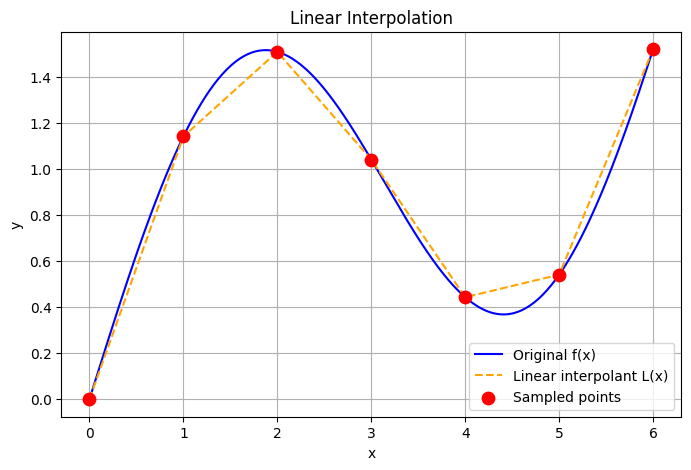

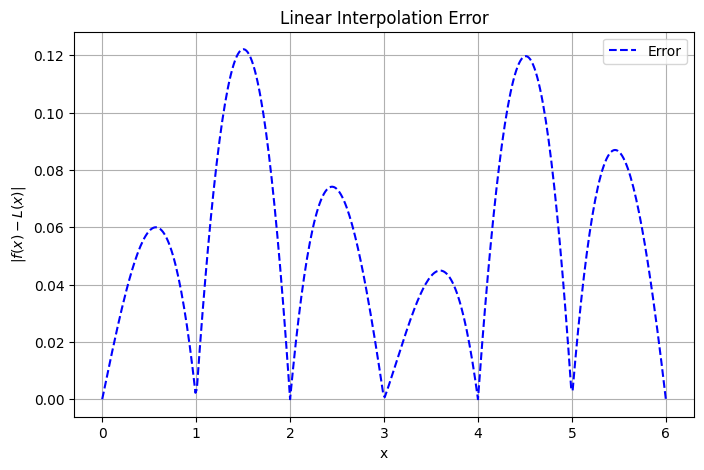

Function max error = 1.221e-01
Function RMS error = 6.472e-02


In [6]:
def linear_int(x,x0,f0,x1,f1):
    """Returns the value of a function at point x
    through linear interpolation between points (x0,y0) and (x1,y1)."""
    return f0 + (f1 - f0) * (x-x0) / (x1-x0)


def f_linear_int(x, xdata, fdata):
    """Returns linear interpolation of a function at point x.
    xdata and ydata are the data points used in interpolation.
    xdata is assumed to be in sorted in ascending order."""
    ind = np.searchsorted(xdata, x) # Search the right interval for point x
    if (ind == 0):
        if ((xdata[0] - x) > 1e-12):
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
        ind = ind + 1
    if (ind == len(xdata)):
        if ((x - xdata[-1]) > 1e-12):
            print("x = ", x, " is outside the interpolation range [",xdata[0],",",xdata[-1],"]")
        ind = ind - 1
    x0,f0 = xdata[ind-1],fdata[ind-1]
    x1,f1 = xdata[ind],fdata[ind]
    return linear_int(x,x0,f0,x1,f1)


# Dense grid for comparison/plots
x = np.linspace(0, 6.0, 400)
y_true = f(x)
# Evaluate linear interpolant on dense grid using your function
y_lin = np.array([f_linear_int(xi, x_sample, y_sample) for xi in x])

# -----------------------------
# Plot original vs linear interpolant
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(x, y_true, color='blue', label="Original f(x)")
plt.plot(x, y_lin, "--", color='orange', label="Linear interpolant L(x)")
plt.scatter(x_sample, y_sample, s=80, color="red", zorder=3, label="Sampled points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Interpolation")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Plot interpolation error
# -----------------------------
err = np.abs(y_true - y_lin)

plt.figure(figsize=(8,5))
plt.plot(x, err, "--", color='blue', label=r"Error")
plt.xlabel("x")
plt.ylabel(r"$|f(x) - L(x)|$")
plt.title("Linear Interpolation Error")
plt.grid(True)
plt.legend()
plt.show()

print(f"Function max error = {np.max(err):.3e}")
print(f"Function RMS error = {np.sqrt(np.mean(err**2)):.3e}")



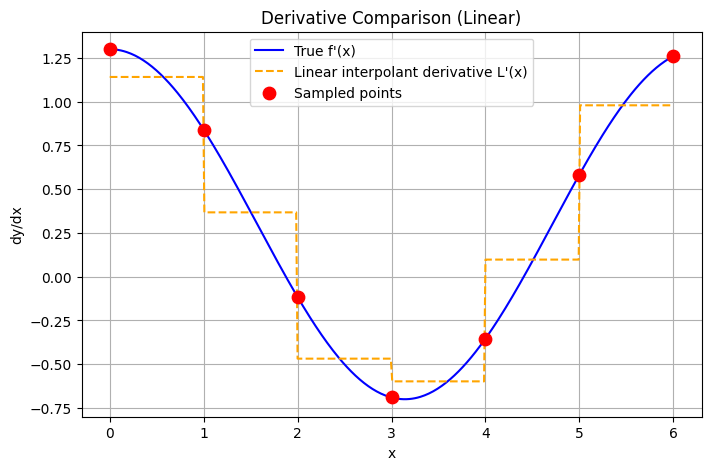

Derivative error norms on dense grid:
  max |f'(x) - L'(x)| = 4.786e-01
  RMS |f'(x) - L'(x)| = 2.060e-01


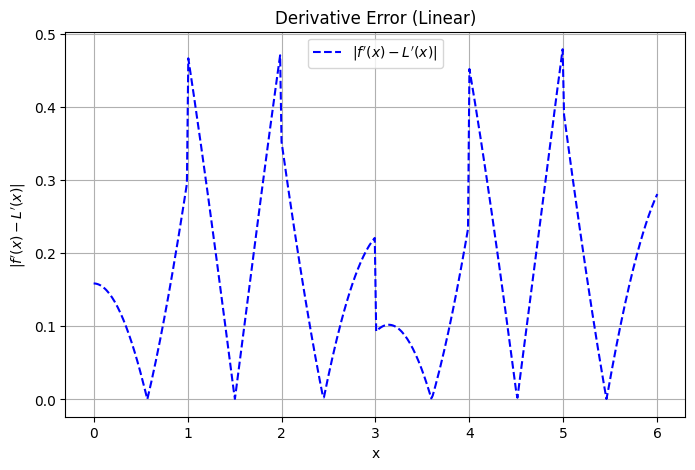

In [7]:
# -----------------------------
# Derivatives: true vs interpolant
# -----------------------------
yprime_true = fprime(x)
y_sample_prime = fprime(x_sample)

# Linear interpolant derivative is piecewise constant slope on each interval
slopes = np.diff(y_sample) / np.diff(x_sample)

# Assign each x to its interval slope
idx = np.searchsorted(x_sample, x, side="right") - 1
idx = np.clip(idx, 0, len(slopes)-1)
yprime_lin = slopes[idx]

# Plot derivatives
plt.figure(figsize=(8,5))
plt.plot(x, yprime_true, color='blue', label="True f'(x)")
plt.plot(x, yprime_lin, "--", color='orange', label="Linear interpolant derivative L'(x)")
plt.scatter(x_sample, y_sample_prime, s=80, color="red", zorder=3, label="Sampled points")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.title("Derivative Comparison (Linear)")
plt.grid(True)
plt.legend()
plt.show()


# -----------------------------
# Derivative error + norms
# -----------------------------
derr = np.abs(yprime_true - yprime_lin)
Linf = np.max(derr)
L2 = np.sqrt(np.mean(derr**2))

print("Derivative error norms on dense grid:")
print(f"  max |f'(x) - L'(x)| = {Linf:.3e}")
print(f"  RMS |f'(x) - L'(x)| = {L2:.3e}")

plt.figure(figsize=(8,5))
plt.plot(x, derr, "--", color='blue', label=r"$|f'(x)-L'(x)|$")
plt.xlabel("x")
plt.ylabel(r"$|f'(x) - L'(x)|$")
plt.title("Derivative Error (Linear)")
plt.grid(True)
plt.legend()
plt.show()

The linear interpolant matches the function exactly at the sampled points but deviates between them due to its piecewise straight-line nature. The interpolation error is larger than in the spline case for this smooth function. The derivative of the linear interpolant is piecewise constant, producing a stair-step profile that differs significantly from the smooth analytical derivative. This results in noticeably larger derivative errors compared to the spline interpolation, which better captures the smooth curvature of the function.

Problem 4: Lagrange polynomial interpolation
- Interpolate the function using Lagrange polynomial method
- Plot the difference between original and interpolated function
- Differentiate the function (analytically or numerically)
- Differentiate the interpolated function
- Compare the results

## Answer 4

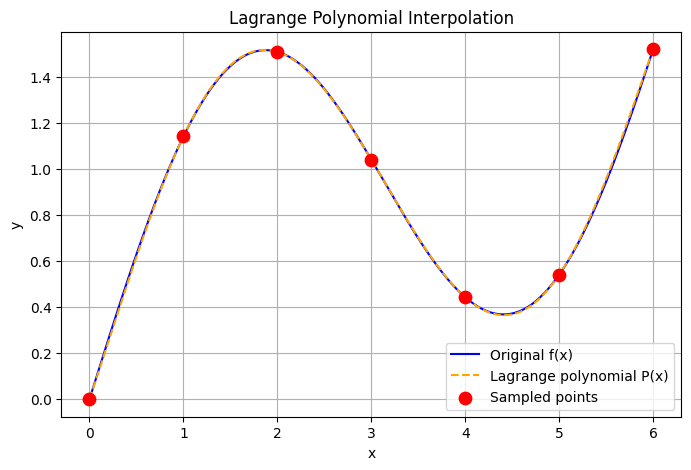

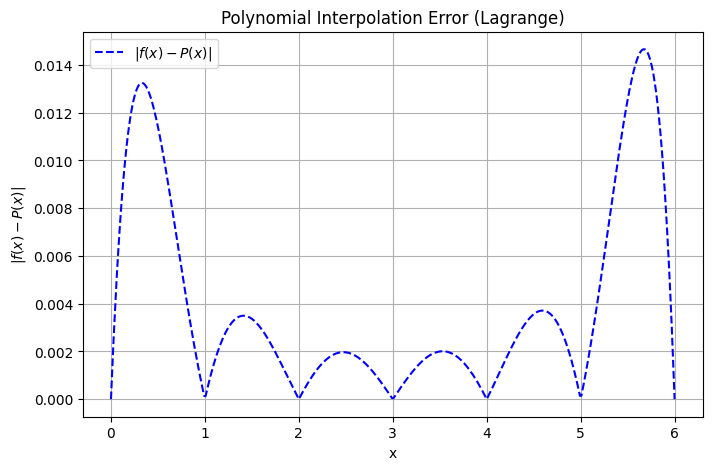

Function max error = 1.466e-02
Function RMS error = 5.737e-03


In [8]:
def Lnj(x,n,j,xdata):
    """Lagrange basis function."""
    ret = 1.
    for k in range(0, len(xdata)):
        if (k != j):
            ret *= (x - xdata[k]) / (xdata[j] - xdata[k])
    return ret


def f_poly_int(x, xdata, fdata):
    """Returns the polynomial interpolation of a function at point x.
    xdata and ydata are the data points used in interpolation."""
    ret = 0.
    n = len(xdata) - 1
    for j in range(0, n+1):
        ret += fdata[j] * Lnj(x,n,j,xdata)
    return ret

# Evaluate Lagrange polynomial on dense grid
y_poly = np.array([f_poly_int(xi, x_sample, y_sample) for xi in x])

# -----------------------------
# Plot original vs polynomial interpolant
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(x, y_true, color='blue', label="Original f(x)")
plt.plot(x, y_poly, "--", color='orange', label="Lagrange polynomial P(x)")
plt.scatter(x_sample, y_sample, s=80, color='red', zorder=3, label="Sampled points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange Polynomial Interpolation")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Plot interpolation error
# -----------------------------
err = np.abs(y_true - y_poly)

plt.figure(figsize=(8,5))
plt.plot(x, err, "--", color='blue', label=r"$|f(x)-P(x)|$")
plt.xlabel("x")
plt.ylabel(r"$|f(x) - P(x)|$")
plt.title("Polynomial Interpolation Error (Lagrange)")
plt.grid(True)
plt.legend()
plt.show()

print(f"Function max error = {np.max(err):.3e}")
print(f"Function RMS error = {np.sqrt(np.mean(err**2)):.3e}")




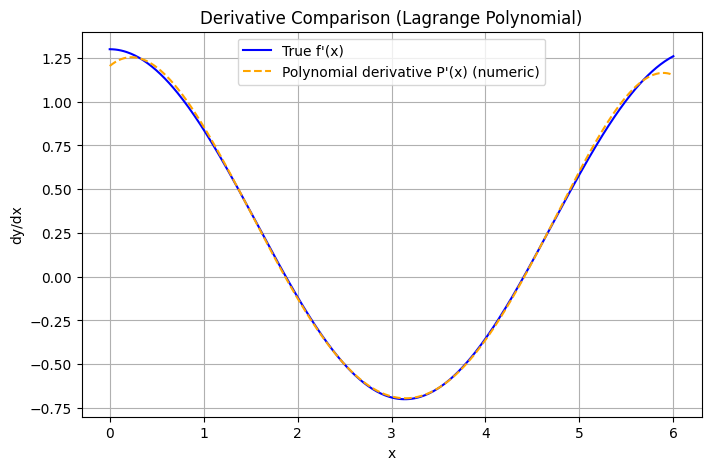

Derivative error norms on dense grid:
  max |f'(x) - P'(x)| = 1.079e-01
  RMS |f'(x) - P'(x)| = 2.133e-02


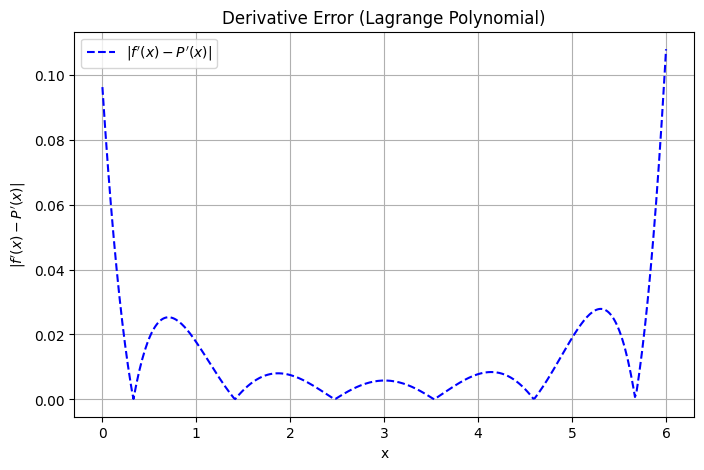

In [9]:
# -----------------------------
# Derivative comparison
#   True derivative: analytic
#   Polynomial derivative: numerical (central difference)
# -----------------------------
yprime_true = fprime(x)

h = 1e-6  # small step for numerical derivative
yprime_poly = np.array([
    (f_poly_int(xi + h, x_sample, y_sample) - f_poly_int(xi - h, x_sample, y_sample)) / (2*h)
    for xi in x
])

plt.figure(figsize=(8,5))
plt.plot(x, yprime_true, color='blue', label="True f'(x)")
plt.plot(x, yprime_poly, "--", color='orange', label="Polynomial derivative P'(x) (numeric)")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.title("Derivative Comparison (Lagrange Polynomial)")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Derivative error + norms
# -----------------------------
derr = np.abs(yprime_true - yprime_poly)
Linf = np.max(derr)
L2 = np.sqrt(np.mean(derr**2))

print("Derivative error norms on dense grid:")
print(f"  max |f'(x) - P'(x)| = {Linf:.3e}")
print(f"  RMS |f'(x) - P'(x)| = {L2:.3e}")

plt.figure(figsize=(8,5))
plt.plot(x, derr, "--", color='blue', label=r"$|f'(x)-P'(x)|$")
plt.xlabel("x")
plt.ylabel(r"$|f'(x) - P'(x)|$")
plt.title("Derivative Error (Lagrange Polynomial)")
plt.grid(True)
plt.legend()
plt.show()


The Lagrange polynomial interpolant matches the function exactly at the sampled points and provides a close approximation between them for this smooth function. The interpolation error remains small but increases near the boundaries. Differentiating the interpolant shows larger errors than the function interpolation, especially close to the endpoints, because differentiation amplifies small oscillations in the polynomial. Overall, the polynomial interpolant performs well for function values here, while derivative accuracy is more sensitive

Problem 5:
Compare spline, linear, and Lagrange methods in terms of:
- how well they reproduce the function
- how well they reproduce the derivative
- how computationally expensive we expect them to be
- how can spline method be improved?

## Answer 5

- How well they reproduce the function $f(x)$:

  Linear error > Spline error > Lagrange error

  The Lagrange polynomial interpolation reproduces the function very well.
  
- how well they reproduce the derivative $f'(x)$
  
  Linear error > Spline error > Lagrange error

  The Lagrange polynomial interpolation reproduces the derivative very well.
- how computationally expensive we expect them to be
  | Method   | Cost to evaluate at a point | Scaling with number of data points (n) | Notes                              |
| -------- | --------------------------- | -------------------------------------- | ---------------------------------- |
| Linear   | Very cheap                  | (O(1)) per interval                    | Just a slope calculation           |
| Spline   | Moderate                    | (O(1)) after setup                     | Needs solving a small system once  |
| Lagrange | Expensive                   | (O(n)) per evaluation                  | Computes full polynomial each time |

- how can spline method be improved?

  Spline accuracy can be improved by:
  - Increasing the number of sample points
  - Using higher-order splines (quintic, etc.)
  - Providing the true derivative at the ends


Problem 6: Integration
- Integrate the original and (one of the) interpolated functions
- Compare the answers

## Answer 6

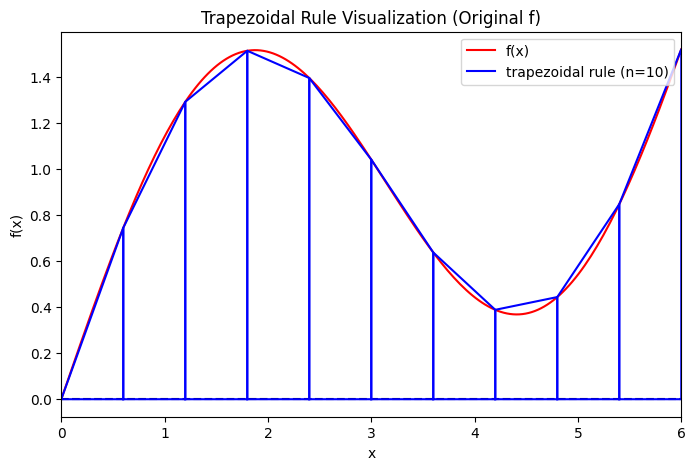

Integral comparison on [0.0,6.0] with n = 4000
Original integral (exact)            = 5.439829713350
Original integral (trapezoidal_rule) = 5.439829705882
Lagrange integral (trapezoidal_rule) = 5.440543271117
Trapezoid error for original         = 7.468e-09
Absolute difference (exact - P)      = 7.136e-04
Relative difference                  = 1.312e-04

   n |  abs(I_exact - I_true)   |  abs(I_exact - I_poly)
----------------------------------------------------------
  10 |  1.202122758587e-03 |  8.035200516305e-04
  20 |  2.991718967449e-04 |  3.290777026486e-04
  40 |  7.470873280369e-05 |  6.171077243629e-04
  80 |  1.867192868765e-05 |  6.894312458172e-04
 160 |  4.667653945134e-06 |  7.075320487191e-04
 320 |  1.166892986681e-06 |  7.120584972782e-04
 640 |  2.917219017462e-07 |  7.131901875299e-04


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a
    fk = f(xk)
    for k in range(n):
        xk += h
        fk1 = f(xk)
        ret += h * (fk + fk1) / 2.0
        fk = fk1
    return ret

def trapezoidal_rule_plot(f, a, b, n, numpoints=200):
    xplot = np.linspace(a, b, numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(a, b)
    plt.axhline(y=0.0, color='black', linestyle='--')
    plt.plot(xplot, yplot, color='red', label='f(x)')

    labeltrap = f"trapezoidal rule (n={n})"

    h = (b - a) / n
    xk = a
    fk = f(xk)

    for k in range(1, n+1):
        xk1 = a + k*h
        fk1 = f(xk1)

        if k == 1:
            plt.plot([xk, xk, xk1, xk1, xk],
                     [0., fk, fk1, 0., 0.],
                     color='blue', label=labeltrap)
        else:
            plt.plot([xk, xk, xk1, xk1, xk],
                     [0., fk, fk1, 0., 0.],
                     color='blue')

        xk, fk = xk1, fk1

    plt.legend()
    return plt

# -----------------------------
# Integration on [a, b]
# -----------------------------
a, b = 0.0, 6.0

# exact integral of f(x) = sin(x) + 0.3x
I_exact = (-np.cos(b) + 0.15*b**2) - (-np.cos(a) + 0.15*a**2)

# Lagrange interpolant as callable (assumes f_poly_int, x_sample, y_sample already exist)
def P(x):
    return f_poly_int(x, x_sample, y_sample)

# Main integration with dense n
n_int = 4000
I_true_trap = trapezoidal_rule(f, a, b, n_int)
I_poly_trap = trapezoidal_rule(P, a, b, n_int)

abs_diff = abs(I_exact - I_poly_trap)
rel_diff = abs_diff / abs(I_exact)
trap_error = abs(I_exact - I_true_trap)

# Visualization with small n (so trapezoids are visible)
plt.figure(figsize=(8,5))
trapezoidal_rule_plot(f, a, b, n=10)
plt.title("Trapezoidal Rule Visualization (Original f)")
plt.show()

# Print comparison
print(f"Integral comparison on [{a},{b}] with n = {n_int}")
print(f"Original integral (exact)            = {I_exact:.12f}")
print(f"Original integral (trapezoidal_rule) = {I_true_trap:.12f}")
print(f"Lagrange integral (trapezoidal_rule) = {I_poly_trap:.12f}")
print(f"Trapezoid error for original         = {trap_error:.3e}")
print(f"Absolute difference (exact - P)      = {abs_diff:.3e}")
print(f"Relative difference                  = {rel_diff:.3e}")
print()

# Convergence table
print("   n |  abs(I_exact - I_true)   |  abs(I_exact - I_poly)")
print("----------------------------------------------------------")
for n in [10, 20, 40, 80, 160, 320, 640]:
    I_true = trapezoidal_rule(f, a, b, n)   # <-- ADD THIS LINE
    I_poly = trapezoidal_rule(P, a, b, n)
    print(f"{n:4d} | {abs(I_exact - I_true): .12e} | {abs(I_exact - I_poly): .12e}")



The trapezoidal‐rule error for the original function decreases rapidly as n increases, consistent with the expected second-order accuracy $O(h^2)$. Each time the number of subintervals is doubled, the error is reduced by approximately a factor of four, confirming the theoretical error behavior. In contrast, the error in the integral of the Lagrange interpolant approaches a constant value of approximately $7\times10^{-4}$ as n increases. This shows that once the quadrature error becomes very small, the remaining discrepancy is dominated by the interpolation error rather than the numerical integration method.

Problem 7. Finding  roots:
- Find the root of the equation y = (2 * x + 3) * np.exp(-x) + np.log(x)-1.7 on the interval [0.1, 10]
- Do you expect there will be roots for x > 10? Why?

## Answer 7

In [15]:
import numpy as np

# -----------------------------
# Given function
# -----------------------------
def func1(x):
    return (2*x + 3)*np.exp(-x) + np.log(x) - 1.7

# -----------------------------
# Bisection method (your code)
# -----------------------------
bisection_verbose = False
last_bisection_iterations = 0

def bisection_method(f, a, b, tolerance=1.e-10):
    fa = f(a)
    fb = f(b)

    if (fa * fb > 0.):
        return None

    global last_bisection_iterations
    last_bisection_iterations = 0

    while ((b - a) > tolerance):
        last_bisection_iterations += 1
        c = (a + b) / 2.0
        fc = f(c)

        if bisection_verbose:
            print(f"Iteration: {last_bisection_iterations:5}, c = {c:20.15f}, f(c) = {fc:10.15f}")

        if (fc * fa < 0.):
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (a + b) / 2.0

# -----------------------------
# Step 1: Scan interval to find sign changes
# -----------------------------
a, b = 0.1, 10
x_scan = np.linspace(a, b, 2000)
y_scan = func1(x_scan)

brackets = []
for i in range(len(x_scan)-1):
    if y_scan[i] * y_scan[i+1] < 0:
        brackets.append((x_scan[i], x_scan[i+1]))

# -----------------------------
# Step 2: Apply bisection on each bracket
# -----------------------------
roots = []
for (a_i, b_i) in brackets:
    root = bisection_method(func1, a_i, b_i)
    roots.append(root)

# -----------------------------
# Print results
# -----------------------------
print("Bracketing intervals found:")
for br in brackets:
    print(br)

print("\nRoots found on [0.1, 10]:")
for r in roots:
    print(f"x = {r:.12f},  f(x) = {func1(r):.3e}")


Bracketing intervals found:
(np.float64(0.46153076538269133), np.float64(0.46648324162081045))
(np.float64(1.6946973486743373), np.float64(1.6996498249124565))
(np.float64(5.022761380690345), np.float64(5.0277138569284645))

Roots found on [0.1, 10]:
x = 0.461981862317,  f(x) = 2.709e-11
x = 1.699085427632,  f(x) = -2.853e-12
x = 5.023538804693,  f(x) = -4.148e-13


The equation has three roots on $[0.1,10]$: $x \approx 0.46198, 1.69909, 5.02354$. For $x>10$, no additional roots are expected because the exponential term decays to zero, so the function behaves like $\ln(x)-1.7$, which increases without bound. Moreover, $f'(x) = 1/x -(2x+1)e^{-x} > 0$ for $x \ge 10$, and since $f(10)>0$, the function remains positive for all $x>10$.


Note that for the subsequent 3 problems the answers can be correct and non-unique. So the important thing is to explain your logic.

Problem 8. Consider a ternary phase diagram of the system AxByC1-x-y as a function of (x,y,T,P), where T is temperature and P is pressure
- What is the dimensionality of the parameter space?
- Is the parameter space differentiable?
- Choose some function over this parameter space - it can be indicator function indicating the presence of some phase, or weight fraction of some phase, oe even mechanical or electric properties of th esystem
- Is this function continuous?
- Is this function differentiable?
- Can this function be interpolated, if we have measurements at certain points?
- Can this function be integrated?

## Answer 8

Let the composition $A_{x}B_{y}C_{1 - x - y}$ with constraints $x \ge 1, \, y \ge 1, \, x+y \le 1$ and state variables temperature (T) and pressure (P).

* Dimensionality of the parameter space:
  
  The independent variables are $x, y, T,$ and $P$. Since the composition satisfies

  $$
  x + y + (1-x-y) = 1,
  $$

  the composition has two degrees of freedom. Adding temperature and pressure gives a four-dimensional parameter space.

* Is the parameter space differentiable?

  The interior ($x > 0, y > 0, x+y < 1$) of the space is differentiable because it behaves like an open region in $\mathbb{R}^4$. However, the boundaries $(x=0, y=0, x+y=1)$ form edges and corners, so smoothness is limited there.

* Example of a function on this space:

  An example is the weight fraction of a   phase

  $$
  w_\alpha(x,y,T,P),
  $$

  or an indicator function

  $$
  I_\alpha(x,y,T,P),
  $$

  that shows whether a phase is present.

* Is this function continuous?

  Not everywhere. Inside a single phase region it is usually continuous, but across phase boundaries it may change abruptly (especially for indicator functions).

* Is this function differentiable?

  It is differentiable inside regions where the phase does not change, but generally not differentiable at phase boundaries.

* Can this function be interpolated from measurements?

  Yes, but care is needed. Smooth interpolation works inside single-phase regions, while phase boundaries may require piecewise or classification-based interpolation.

* Can this function be integrated?

  Yes. Even if the function is not continuous or differentiable everywhere, it can still be integrated over the parameter space as long as it is bounded.


Problem 9. Consider charging of the battery, where charging is induced by applying bias over time, V(t).
- What is the dimensionality of the parameter space?
- Is the parameter space differentiable?
- Choose some function over this parameter space - it can be state of charge after charging or state of health. Or probability of thermal runaway.
- Is this function continuous?
- Is this function differentiable?
- Can this function be interpolated, if we have measurements at certain points?
- Can this function be integrated?

## Answer 9

* Dimensionality of the parameter space

  The input to the system is a time-dependent charging protocol $V(t)$.
  In principle, a whole function is an infinite-dimensional object. In practice, we usually represent $V(t)$ using a finite number of parameters (for example, amplitude, ramp rate, pulse height, pulse duration, etc.).

  Therefore, the parameter space can be treated as an n-dimensional space, where n is the number of parameters used to describe $V(t)$.

* Is the parameter space differentiable?

  If $V(t)$ is described using a finite set of parameters, then the parameter space behaves like an open subset of $\mathbb{R}^n$, which is differentiable (except at physical limits such as maximum voltage constraints).

  If $V(t)$ is treated as a general function, the space can still be considered differentiable under suitable assumptions, but this becomes more mathematically complex.

* Example of a function on this space

  An example is the final state of charge after charging

  $$
  f[V(\cdot)] = \mathrm{SOC}(t_f),
  $$

  or the probability of thermal runaway

  $$
  g[V(\cdot)] = \mathbb{P}(\text{thermal runaway} \mid V(t)).
  $$

* Is this function continuous?

  In many cases, the function is approximately continuous. A small change in the charging protocol $V(t)$ usually produces a small change in $\mathrm{SOC}(t_f)$.

  However, near safety thresholds (such as overheating or over-voltage conditions), the function may change abruptly, so continuity may fail in those regions.

* Is this function differentiable?

  Within normal operating conditions, the mapping from the parameters of $V(t)$ to outputs such as $\mathrm{SOC}(t_f)$ can be differentiable.

  Differentiability may fail when the system switches regimes, for example when protection mechanisms activate or when side reactions begin. Indicator-type outputs (like failure or runaway) are generally not differentiable.

* Can this function be interpolated from measurements?

  Yes. If measurements are available for several charging protocols, interpolation or surrogate modeling (such as regression, splines, Gaussian processes, or neural networks) can be used.

  Interpolation works best when the function is smooth; near threshold regions, piecewise or classification-based methods may be required.

* Can this function be integrated?

  Yes. For example, the total energy delivered during charging is

  $$
  E = \int_0^{t_f} I(t) \, V(t) \,dt.
  $$

  More generally, one can integrate performance metrics over a range of charging protocols to compute average or expected behavior.


Problem 10. Consider the chemical space of small molecules, https://en.wikipedia.org/wiki/Chemical_space .
- What is the dimensionality of the parameter space?
- Is the parameter space differentiable?
- Choose some function over this parameter space - it can be anything from molecular weight to enthalpy of formation, HOMO-LUMO gap, etc/
- Is this function continuous?
- Is this function differentiable?
- Can this function be interpolated, if we have measurements at certain points?
- Can this function be integrated?

## Answer 10

* Dimensionality of the parameter space:

  “Chemical space” is huge. If we describe a molecule by a vector of features (molecular descriptors or fingerprints), then the dimensionality is basically the number of descriptors we choose (could be tens, hundreds, or thousands). In a more fundamental sense, the space of all possible molecular graphs is effectively extremely high-dimensional (and not like a simple 3D or 4D space).

* Is the parameter space differentiable?

  Usually not in the usual calculus sense, because molecules are discrete objects (atoms or bonds). If we embed molecules into a continuous descriptor space (like real-valued features), then that embedding space is differentiable, but the underlying “molecule-to-molecule” changes are still discrete.

* Example of a function on this space:

  For example, molecular weight $M$, enthalpy of formation $\Delta H_f$, or the HOMO–LUMO gap $E_g$ as a function of the molecule.

* Is this function continuous?

  As a function of the discrete molecule identity, it is not continuous (changing one atom or bond can cause a jump). In a continuous descriptor embedding, it can look approximately continuous locally, but it is not guaranteed globally.

* Is this function differentiable?

  Generally not differentiable on the true molecular graph space. In a continuous representation, we can sometimes define gradients with respect to continuous parameters (like 3D geometry or learned latent variables) but with respect to changing the molecule, it is not differentiable in the standard way.

* Can this function be interpolated from measurements?

  Yes, that’s what ML models do. If we have measured properties for some molecules, we can build a surrogate model to predict nearby molecules in descriptor space. But interpolation is tricky because nearby depends on the chosen representation and sharp changes can happen.

* Can this function be integrated?

  In principle yes, but we have to define a measure or distribution over molecules, since the space is discrete. Practically, people compute averages or expected values like
  $
  \mathbb{E}[f] = \sum_{\text{molecules}} f(m)\, p(m)
  $
  or approximate it by sampling (Monte Carlo) from a dataset or a generative model.
